## 선형 변환의 연속 적용: 변환의 합성(Composition)

선형 변환의 합성은 하나의 변환을 적용한 결과에 또 다른 변환을 연속해서 적용하는 과정을 의미한다. 여러 단계의 기하학적 변형을 하나의 통합된 변환으로 만들 수 있게 해준다. 이 합성된 변환 역시 또 다른 하나의 선형 변환이며, 이는 각 개별 변환에 해당하는 행렬들을 순서대로 곱한 것과 같다.

### 합성 변환과 행렬 곱셈

벡터 `v`에 변환 T1을 적용하고, 그 결과에 변환 T2를 적용하는 합성 변환은 $T_2 \circ T_1 = T_2(T_1(v))$ 로 표현된다.

만약 변환 T1에 해당하는 행렬이 A1이고, T2에 해당하는 행렬이 A2라면, 합성 변환 $(T_2 \circ T_1)$에 해당하는 행렬은 **A2 @ A1** 이다.

**$T_2(T_1(v)) = (A_2 A_1) v$**

**핵심**: 변환이 적용되는 순서(T1 먼저, T2 나중)와 행렬이 곱해지는 순서(A2가 왼쪽에, A1이 오른쪽에)는 반대이다. 이는 벡터 `v`에 가까운 행렬(A1)이 먼저 계산되기 때문이다.

### 파이썬으로 합성 변환 시각화하기

다음 두 가지 변환을 순서대로 적용하는 합성을 시각화해본다.
1.  **T1**: 공간을 반시계 방향으로 90도 회전시키는 변환.
2.  **T2**: 수평 방향으로 전단(shear)하는 변환.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Polygon

# 시각화를 위한 설정
plt.style.use('seaborn-v0_8-whitegrid')
plt.rcParams['font.family'] = 'Malgun Gothic' # 한글 폰트 설정
plt.rcParams['axes.unicode_minus'] = False # 마이너스 부호 깨짐 방지

# 변환할 사각형 정의
square = np.array([[0,0], [1,0], [1,1], [0,1]])

# 변환 1 (T1): 90도 회전 행렬 A1
angle = np.pi / 2 # 90도
A1_rotation = np.array([
    [np.cos(angle), -np.sin(angle)],
    [np.sin(angle), np.cos(angle)]
])

# 변환 2 (T2): 수평 전단 행렬 A2
k = 1.0
A2_shear = np.array([
    [1, k],
    [0, 1]
])

print(f"회전 행렬 A1:\n{np.round(A1_rotation)}")
print(f"\n전단 행렬 A2:\n{A2_shear}")

회전 행렬 A1:
[[ 0. -1.]
 [ 1.  0.]]

전단 행렬 A2:
[[1. 1.]
 [0. 1.]]


#### 1. 변환을 순차적으로 적용

In [2]:
# 단계 1: 회전 변환 적용
rotated_square = (A1_rotation @ square.T).T

# 단계 2: 회전된 결과에 전단 변환 적용
final_square_sequential = (A2_shear @ rotated_square.T).T

#### 2. 합성 행렬을 한 번에 적용

In [3]:
# 합성 변환 행렬 계산 (A_composite = A2 @ A1)
A_composite = A2_shear @ A1_rotation

# 합성 행렬을 원본 사각형에 바로 적용
final_square_composite = (A_composite @ square.T).T

print(f"합성 행렬 (A2 @ A1):\n{np.round(A_composite)}")
print("\n순차 적용 결과와 합성 행렬 적용 결과가 동일한가?")
print(np.allclose(final_square_sequential, final_square_composite))

합성 행렬 (A2 @ A1):
[[ 1. -1.]
 [ 1.  0.]]

순차 적용 결과와 합성 행렬 적용 결과가 동일한가?
True


#### 시각화로 결과 비교

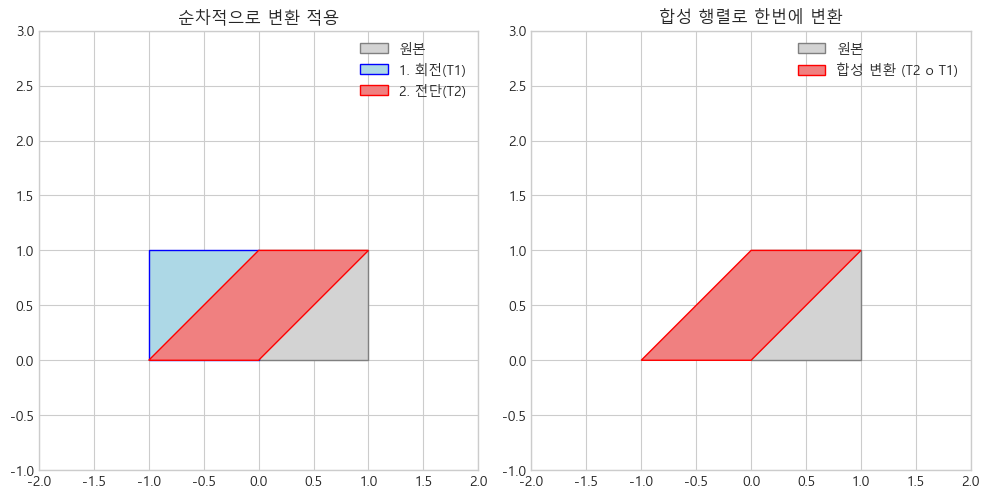

In [4]:
plt.figure(figsize=(10, 5))

# 1. 순차 변환 과정
plt.subplot(1, 2, 1)
plt.gca().add_patch(Polygon(square, fc='lightgray', ec='gray', label='원본'))
plt.gca().add_patch(Polygon(rotated_square, fc='lightblue', ec='blue', label='1. 회전(T1)'))
plt.gca().add_patch(Polygon(final_square_sequential, fc='lightcoral', ec='red', label='2. 전단(T2)'))
plt.title('순차적으로 변환 적용')
plt.grid(True)
plt.legend()
plt.gca().set_aspect('equal', adjustable='box')
plt.xlim(-2, 2); plt.ylim(-1, 3)

# 2. 합성 변환 결과
plt.subplot(1, 2, 2)
plt.gca().add_patch(Polygon(square, fc='lightgray', ec='gray', label='원본'))
plt.gca().add_patch(Polygon(final_square_composite, fc='lightcoral', ec='red', label='합성 변환 (T2 o T1)'))
plt.title('합성 행렬로 한번에 변환')
plt.grid(True)
plt.legend()
plt.gca().set_aspect('equal', adjustable='box')
plt.xlim(-2, 2); plt.ylim(-1, 3)

plt.tight_layout()
plt.show()

왼쪽 그래프는 변환을 단계별로 보여주며, 오른쪽 그래프는 두 행렬을 곱하여 만든 단 하나의 '합성 행렬'로 동일한 최종 결과를 얻는 것을 보여준다. 이처럼 행렬 곱셈은 선형 변환의 합성을 표현하는 매우 효율적인 방법이다.

#### 요약

선형 변환의 합성은 여러 변환을 연속적으로 적용하는 과정이며, 이는 각 변환 행렬의 곱으로 표현되는 단일 선형 변환과 같다.

선형 변환의 합성은 행렬곱과 동치